In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari
import joblib
import glob
import os
from IPython.display import display, Markdown

pd.options.display.max_columns = None
sb.set()

In [90]:
fastat = joblib.load("../stats/asm_fastastat.jl")
fastat.set_index(["sample", "project", "hap"], inplace=True, drop=False)
mapstat = joblib.load("../stats/asm_mapstat.jl")
mapstat.set_index(["sample", "project", "hap", 'reference'], inplace=True, drop=False)

redund_samples = ["HG00733", "NA12878", "NA24385"]

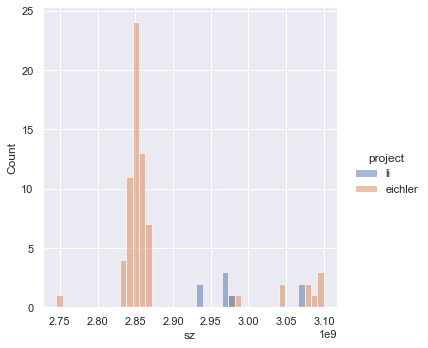

In [91]:
sb.displot(data=fastat, x="sz", hue="project")

In [92]:
fastat.loc[redund_samples]

gs          sz     nn  n50_0_len  n50_0_cnt  \
sample  project hap                                                        
HG00733 li      1    3100000000  2934104221   4445   99596375          1   
                2    3100000000  2932835189   4379   99394410          1   
        eichler 1    3100000000  2840397816   1630  110143715          1   
                2    3100000000  2843598981   1624  130439096          1   
NA12878 li      1    3100000000  2971183345   9334   74794234          1   
                2    3100000000  2967421321   9127   95110091          1   
        eichler 1    3100000000  2983172001  10406   77432055          1   
                2    3100000000  2978871542  10136   86208249          1   
NA24385 li      1    3100000000  2976881925   5912  126420490          1   
                2    3100000000  2971788454   5735   78262190          1   
        eichler 1    3100000000  3094784888   8003   90996338          1   
                2    3100000000  3085379842   7639  101768708          1   

                     n50_10_len  n50_10_cnt  n50_20_len  n50_20_cnt  \
sample  project hap                                                   
HG00733 li      1      75612458           4    50524338           9   
                2      80163583           4    55246799           9   
        eichler 1      79348976           4    68037469           8   
                2      94593646           3    65364012           8   
NA12878 li      1      50694276           5    35751600          13   
                2      68379533           4    38804147          11   
        eichler 1      55258058           5    40014433          12   
                2      48478733           5    39267196          12   
NA24385 li      1      90722359           3    66609635           7   
                2      50562991           6    44055962          12   
        eichler 1      74690036           4    60212770           9   
                2      74378437           4    66712374           8   

                     n50_30_len  n50_30_cnt  n50_40_len  n50_40_cnt  \
sample  project hap                                                   
HG00733 li      1      41704261          15    33387302          23   
                2      44180560          15    33391038          23   
        eichler 1      54651328          13    36514788          20   
                2      47298403          13    39435849          20   
NA12878 li      1      30822253          22    23732263          34   
                2      30250431          20    25471250          31   
        eichler 1      31388855          21    25725300          32   
                2      30547522          21    25734672          32   
NA24385 li      1      40413939          14    32090427          22   
                2      35955570          20    28890411          30   
        eichler 1      44849735          15    38531043          22   
                2      39776459          15    30005251          24   

                     n50_50_len  n50_50_cnt  n50_60_len  n50_60_cnt  \
sample  project hap                                                   
HG00733 li      1      25179146          34    16107890          50   
                2      26075339          34    17492139          48   
        eichler 1      30047949          29    20769987          41   
                2      31878070          29    25696947          40   
NA12878 li      1      18638219          48    13807725          68   
                2      17664930          46    14060063          65   
        eichler 1      17997255          47    13820376          67   
                2      18924496          46    13918797          66   
NA24385 li      1      22873382          34    15064577          51   
                2      23034913          41    14396559          59   
        eichler 1      31331165          31    18242879          44   
                2      25434677          35    1722

In [93]:
mapstat["map_base_pct"] = mapstat["mapped bases"] / fastat["sz"]

[Text(0.5, 1.0, 'Percent of assembly mapped (redundant samples)')]

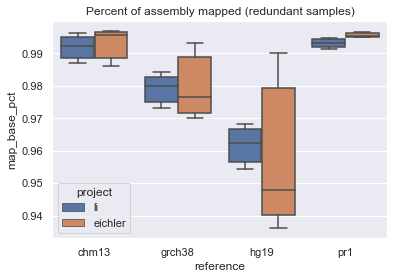

In [120]:
p = sb.boxplot(data=mapstat.loc[redund_samples], x="reference", y="map_base_pct", hue="project")
p.set(title="Percent of assembly mapped (redundant samples)")

[Text(0.5, 1.0, 'reference bases covered by exactly one contig (redundant samples)'),
 Text(0, 0.5, 'bases')]

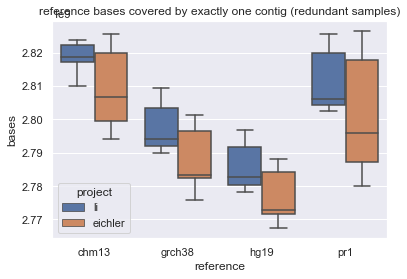

In [121]:
p = sb.boxplot(data=mapstat.loc[redund_samples], x="reference", 
           y="reference bases covered by exactly one contig", 
           hue="project")
p.set(title="reference bases covered by exactly one contig (redundant samples)", ylabel="bases")

[Text(0.5, 1.0, 'Percent of assembly mapped')]

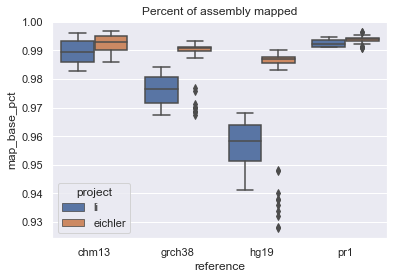

In [122]:
p = sb.boxplot(data=mapstat, x="reference", y="map_base_pct", hue="project")
p.set(title="Percent of assembly mapped")

[Text(0.5, 1.0, 'reference bases covered by exactly one contig'),
 Text(0, 0.5, 'bases')]

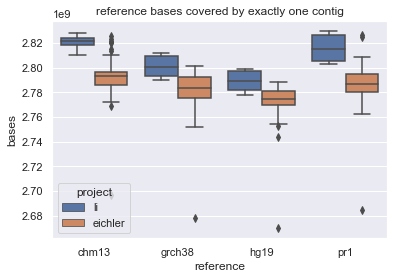

In [124]:
p = sb.boxplot(data=mapstat, x="reference", 
           y="reference bases covered by exactly one contig", 
           hue="project")
p.set(title="reference bases covered by exactly one contig", ylabel="bases")

In [126]:
mapstat[mapstat["reference bases covered by exactly one contig"] <= 2.72e9]

mapped sequences  primary alignments  \
sample  project hap reference                                         
HG00732 eichler 1   chm13                  3222                7487   
                    grch38                 3358                7845   
                    hg19                   3135                7379   
                    pr1                    3779               15289   

                               secondary alignments  \
sample  project hap reference                         
HG00732 eichler 1   chm13                         0   
                    grch38                        0   
                    hg19                          0   
                    pr1                           0   

                               primary alignments with >65535 CIGAR operations  \
sample  project hap reference                                                    
HG00732 eichler 1   chm13                                                    0   
                    grch38                                                   0   
                    hg19                                                     0   
                    pr1                                                      0   

                               bases in mapped sequences  mapped bases  \
sample  project hap reference                                            
HG00732 eichler 1   chm13                    14883132084    2733773260   
                    grch38                   14960910534    2721683663   
                    hg19                     17115081538    2713070331   
                    pr1                      19067892903    2730404604   

                               insertions in [0,50)  insertions in [50,100)  \
sample  project hap reference                                                 
HG00732 eichler 1   chm13                    499402                    2880   
                    grch38                   520034                    3108   
                    hg19                     516555                    3078   
                    pr1                      671508                    4299   

                               insertions in [100,300)  \
sample  project hap reference                            
HG00732 eichler 1   chm13                         2159   
                    grch38                        3256   
                    hg19                          3218   
                    pr1                           2903   

                               insertions in [300,400)  \
sample  project hap reference                            
HG00732 eichler 1   chm13                          919   
                    grch38                        1334   
                    hg19                          1620   
                    pr1                           1249   

                               insertions in [400,1000)  \
sample  project hap reference                             
HG00732 eichler 1   chm13                           593   
                    grch38                         1494   
                    hg19                           1462   
                    pr1                             748   

                               insertions in [1000,inf)  deletions in [0,50)  \
sample  project hap reference                                                  
HG00732 eichler 1   chm13                           481               315462   
                    grch38                          913               337842   
                    hg19                            919               335322   
                    pr1                             584               336395   

                               deletions in [50,100)  deletions in [100,300)  \
sample  project hap reference                                                  
HG00732 eichler 1   chm13                       2842                    2219   
                    grch38                      2535                    1920   
      

In [127]:
metadata = pd.read_csv("../metadata/sample_metadata.txt", sep='\t')
metadata

,Individual,FamilyId,TrioState,Sex,Population code,Population name,Superpopulation code,Superpopulation name,AltIDs
0,NA12878,RM8398,child,female,CEU,Utah Residents (CEPH) with Northern and Wester...,EUR,European Ancestry,"NA12878,ERR3988823,GM19240"
1,NA24385,RM8392,child,male,ASH,Ashkenazi,EUR,European Ancestry,"HG002,GM24385,huAA53E0"
2,HG003,RM8392,father,male,ASH,Ashkenazi,EUR,European Ancestry,NaN
3,HG004,RM8392,mother,female,ASH,Ashkenazi,EUR,European Ancestry,NaN
4,HG005,RM8393,child,male,CHS,Southern Han Chinese,EAS,East Asian Ancestry,NaN
5,HG006,RM8393,father,male,CHS,Southern Han Chinese,EAS,East Asian Ancestry,NaN
6,HG007,RM8393,mother,female,CHS,Southern Han Chinese,EAS,East Asian Ancestry,NaN
7,NA12891,RM8398,father,male,CEU,Utah Residents (CEPH) with Northern and Wester...,EUR,European Ancestry,NaN
8,NA12892,RM8398,mother,female,CEU,Utah Residents (CEPH) with Northern and Wester...,EUR,European Ancestry,NaN
9,HG00096,HG00096,unrel,male,GBR,British,EUR,European Ancestry,NaN


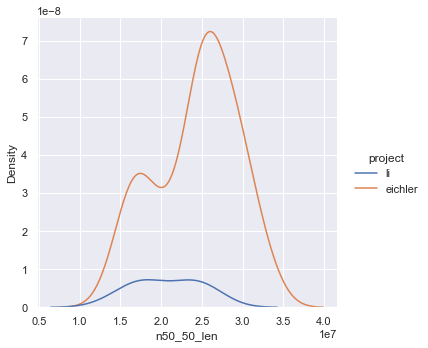

In [112]:
sb.displot(data=fastat, x="n50_50_len", kind="kde", hue="project")